## Importamos las librerias 

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

## Cargamos el dataset

In [4]:
# Cargamos el dataset
df = pd.read_csv("avocado.csv", parse_dates=True)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
# Cambiamos la fecha date time
df['Date'] =pd.to_datetime(df.Date)
df.sort_values(by=['Date'], inplace=True, ascending=True)

In [6]:
df = df.reset_index()

In [7]:
df = df.drop(columns=["Unnamed: 0", "index"])

In [8]:
df = df.rename(columns={"4046":"Small Hass", "4225":"Large Hass", "4770":"XLarge Hass"})

In [9]:
df = df[['Date', 'Total Volume', 'Small Hass', 'Large Hass','XLarge Hass', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','type', 'year', 'region', 'AveragePrice']]

In [10]:
df.head()

,Date,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePrice
0,2015-01-04,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast,1.75
1,2015-01-04,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago,1.49
2,2015-01-04,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton,1.68
3,2015-01-04,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh,1.52
4,2015-01-04,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise,1.64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   Total Volume  18249 non-null  float64       
 2   Small Hass    18249 non-null  float64       
 3   Large Hass    18249 non-null  float64       
 4   XLarge Hass   18249 non-null  float64       
 5   Total Bags    18249 non-null  float64       
 6   Small Bags    18249 non-null  float64       
 7   Large Bags    18249 non-null  float64       
 8   XLarge Bags   18249 non-null  float64       
 9   type          18249 non-null  object        
 10  year          18249 non-null  int64         
 11  region        18249 non-null  object        
 12  AveragePrice  18249 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [ ]:
df.describe()

,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,year,AveragePrice
count,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,1.405978
std,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,0.402677
min,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,0.440000
25%,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,1.100000
50%,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,1.370000
75%,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,1.660000
max,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,3.250000


In [12]:
px.histogram(x = df["AveragePrice"])

In [13]:
px.histogram(x = df["Total Volume"])

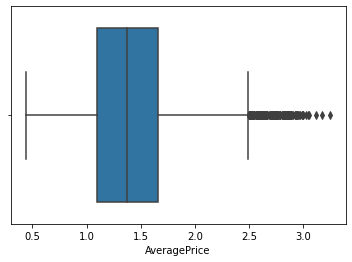

In [14]:
sns.boxplot(x=df["AveragePrice"])

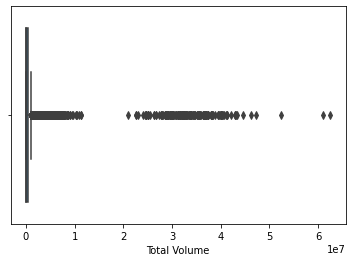

In [15]:
sns.boxplot(x=df["Total Volume"])

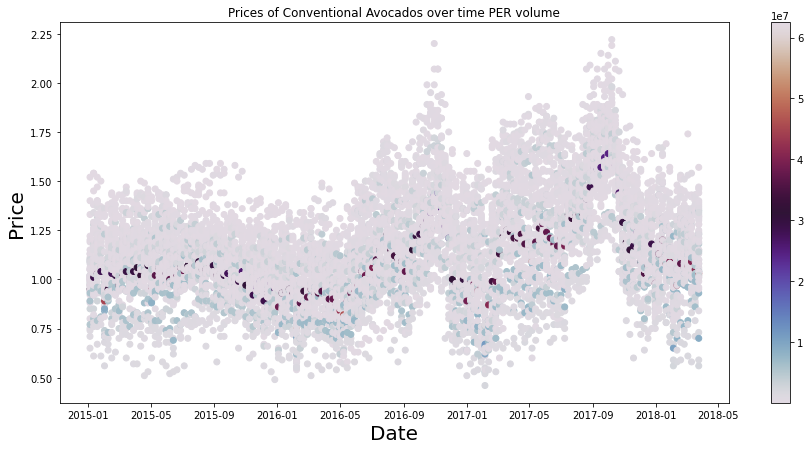

In [16]:
convencionales = df["type"]== "conventional"
organicos = df["type"]== "organic"
fig = plt.figure(figsize = (15, 7))


# Datos de los agucates convencionales 
dates_conventional = df[convencionales]["Date"].tolist()
average_prices_convencional = df[convencionales]["AveragePrice"].tolist()
total_volume_convencional = df[convencionales]["Total Volume"]

# Datos de los agucates organicos 
dates_organic = df[organicos]["Date"].tolist()
average_prices_organicos = df[organicos]["AveragePrice"].tolist()
total_volume_organicos = df[organicos]["Total Volume"]

# Plot
plt.scatter(dates_conventional, average_prices_convencional, c=total_volume_convencional, cmap="twilight")
plt.colorbar()
plt.xlabel("Date", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.title("Prices of Conventional Avocados over time PER volume")
plt.show()

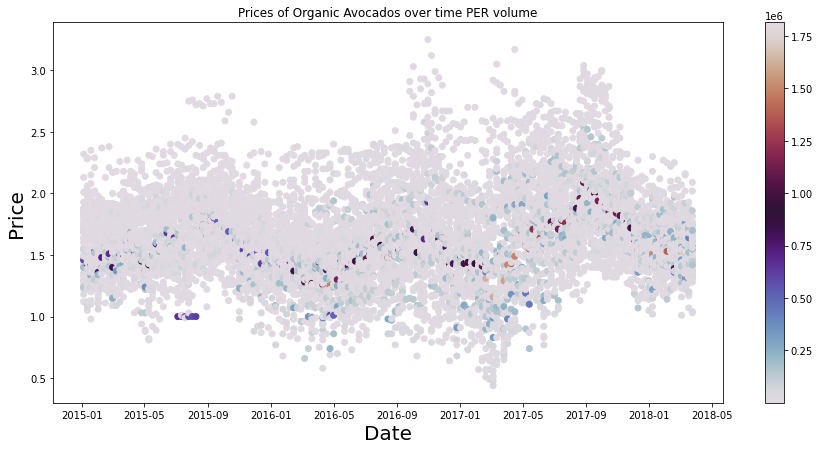

In [17]:
fig = plt.figure(figsize = (15, 7))
plt.scatter(dates_organic, average_prices_organicos, c=total_volume_organicos, cmap="twilight")
plt.colorbar()
plt.xlabel("Date", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.title("Prices of Organic Avocados over time PER volume")
plt.show()

In [18]:
df.region.value_counts()

Southeast              338
NewOrleansMobile       338
SanDiego               338
BaltimoreWashington    338
Roanoke                338
RichmondNorfolk        338
Northeast              338
SouthCentral           338
GreatLakes             338
Louisville             338
Seattle                338
CincinnatiDayton       338
NewYork                338
Indianapolis           338
Chicago                338
Jacksonville           338
Columbus               338
Detroit                338
Philadelphia           338
PhoenixTucson          338
Nashville              338
Portland               338
HartfordSpringfield    338
Tampa                  338
Orlando                338
West                   338
Denver                 338
GrandRapids            338
NorthernNewEngland     338
BuffaloRochester       338
HarrisburgScranton     338
Pittsburgh             338
Boise                  338
LosAngeles             338
LasVegas               338
Atlanta                338
DallasFtWorth          338
M

In [19]:
df.region.unique() 

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

In [20]:
regions_to_remove = ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
df = df[~df.region.isin(regions_to_remove)]
len(df.region.unique())

43

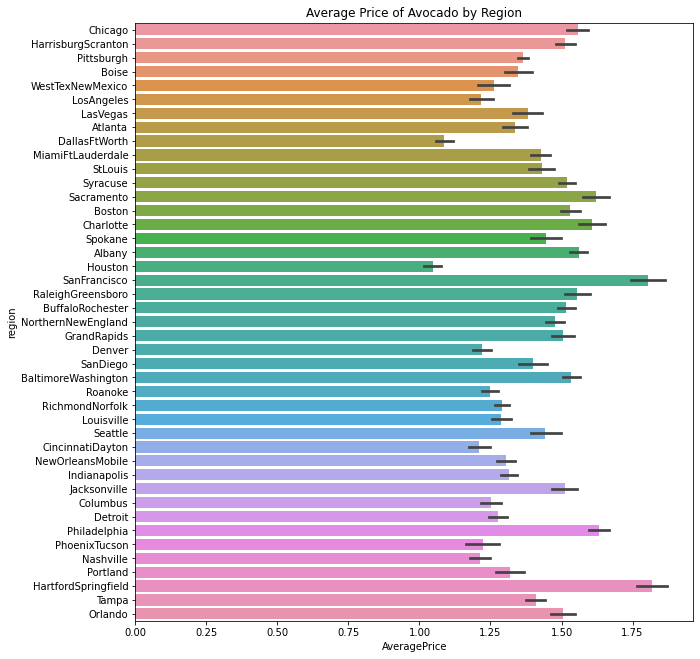

In [21]:
plt.figure(figsize=(10,11))
plt.title("Average Price of Avocado by Region")
sns.barplot(y="region",x="AveragePrice", data= df)
plt.show()

In [22]:
df.isna().sum()

Date            0
Total Volume    0
Small Hass      0
Large Hass      0
XLarge Hass     0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
AveragePrice    0
dtype: int64

In [23]:
df.drop(columns="Date", inplace=True)
df = pd.get_dummies(df, drop_first=True)
df.shape

(14531, 53)

In [25]:
scaler = StandardScaler()
scaler.fit(df)
scaler.transform(df)

array([[-0.52475918, -0.40260819, -0.47504321, ..., -0.15431966,
        -0.15431966, -0.15361705],
       [-0.55970795, -0.40768644, -0.58672398, ..., -0.15431966,
        -0.15431966, -0.15361705],
       [-0.43699239, -0.39359638, -0.33144488, ..., -0.15431966,
        -0.15431966, -0.15361705],
       ...,
       [ 0.44501131,  0.867504  , -0.40014162, ..., -0.15431966,
        -0.15431966, -0.15361705],
       [-0.47592274, -0.40835073, -0.57351041, ..., -0.15431966,
        -0.15431966, -0.15361705],
       [ 1.57427006,  0.29657637,  2.7657993 , ..., -0.15431966,
        -0.15431966, -0.15361705]])

In [26]:
pca = PCA(n_components=2)
pca.fit(df)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.90395013 0.04866989]
[60396065.58409766 14014145.24368098]


In [27]:
df

,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,year,AveragePrice,...,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
1,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,2015,1.49,...,0,0,0,0,0,0,0,0,0,0
2,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,2015,1.68,...,0,0,0,0,0,0,0,0,0,0
3,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,2015,1.52,...,0,0,0,0,0,0,0,0,0,0
4,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,2015,1.64,...,0,0,0,0,0,0,0,0,0,0
5,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.00,2015,0.75,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18240,5518.73,171.22,806.65,3.93,4536.93,2944.89,1592.04,0.00,2018,1.75,...,0,0,0,0,0,0,0,0,0,0
18241,17340.49,295.16,3478.97,81.25,13485.11,12149.49,1335.62,0.00,2018,1.42,...,0,0,0,0,0,0,0,0,0,0
18242,429132.50,258217.83,25970.97,1426.07,143517.63,90870.28,52357.35,290.00,2018,1.32,...,0,0,0,0,0,0,0,0,0,0
18243,38441.23,27.25,2031.54,0.00,36382.44,29466.95,6915.49,0.00,2018,1.74,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df.head(1)

,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,year,AveragePrice,...,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
1,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.0,0.0,2015,1.49,...,0,0,0,0,0,0,0,0,0,0


In [29]:
features = df.drop(columns="AveragePrice")
target = df.AveragePrice

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [30]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
round(model_dt.score(X_test, y_test), 2) * 100

72.0

In [31]:
y_test.shape

(2907,)

In [32]:
modelclasses = [
    ["Linear Regression", LinearRegression()],
    ["Decision Tree Regressor", DecisionTreeRegressor()],
    ["Random Forest Regressor", RandomForestRegressor()],
    ["XGBoost Regressor", XGBRegressor()]
]

insights = []
for modelname, Model in modelclasses:
    model = Model
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)        
    insights.append((modelname, score))

[06:02:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [34]:
insights.sort(key=lambda x:x[-1], reverse=True)
insights

pd.DataFrame(insights, columns=["Model Name", "Score"])

,Model Name,Score
0,Random Forest Regressor,0.855998
1,Decision Tree Regressor,0.714900
2,XGBoost Regressor,0.697980
3,Linear Regression,0.539877
